# **Task 1**
**Prediction using Supervised ML**

Prediction using Supervised Machine Learning to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

To predict, we'll use Linear Regression with Python Scikit Learn. 

**Linear Regression with Python Scikit Learn**

Using Python Scikit-Learn library for machine learning to implement regression functions. We will start with simple linear regression involving two variables.

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



## **Data Preprocessing**

In [27]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### **Data Loading & Preparing**

In [28]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head


<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [29]:
data.shape


(25, 2)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
data.duplicated().sum()

0

In [41]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Data Visualization**

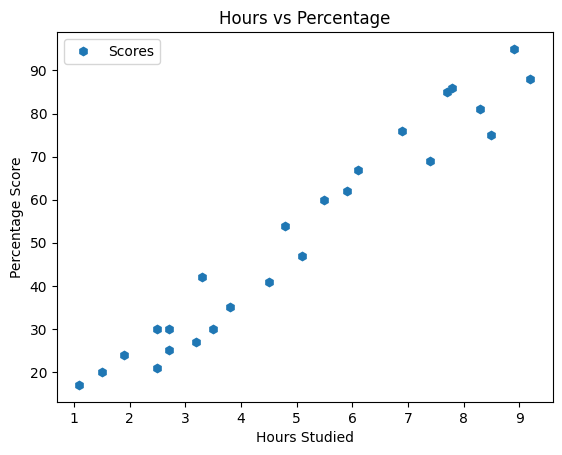

In [47]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='h')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [31]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


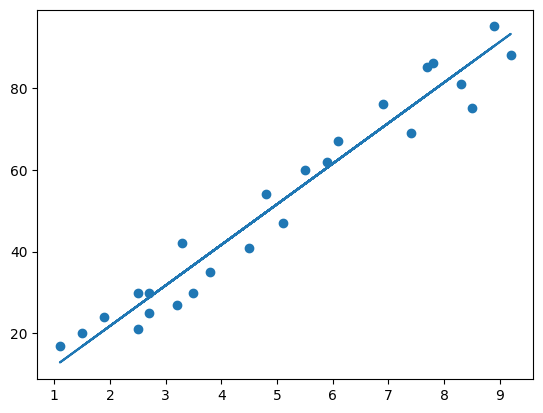

In [34]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## **Predicting the Model**

Now that we have trained our algorithm, it's time to make some predictions.

In [35]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [37]:
import numpy as np

# Assume that the trained model is stored in the 'regressor' variable
hours = 9.25
hours_array = np.array(hours).reshape(1, -1)
predicted_score = regressor.predict(hours_array)

print("Predicted score if a student studies for 9.25 hours/day: {}".format(predicted_score[0]))


Predicted score if a student studies for 9.25 hours/day: 93.69173248737539


## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean_absolute_error,  mean_squared_error,  r2_score. There are many such metrics.

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




Assume that y_test and y_pred are the actual and predicted scores, respectively

In [55]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {}".format(mae))


Mean Absolute Error: 4.183859899002982


In [60]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared Error: {}".format(mse))


Mean squared Error: 21.598769307217456


In [58]:
score_model_test = r2_score(y_pred, y_test)
print("Score of testing data : ", score_model_test*100)
score_model_train = r2_score(y_pred, y_test)
print("Score of testing data : ", score_model_train*100)


Score of testing data :  95.46785947197246
Score of testing data :  95.46785947197246
